### User Overview Analysis 

In [1]:
# import nessary libraries 
import os
import sys
import pandas as pd
import numpy as np

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from src.data_quality_check import DataQualityCheck
from scripts.overview_analyser import UserOverviewAnalysis

In [2]:
from DBConnection.connection import PostgresConnection

In [3]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [4]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [5]:
df=db.fetch_data(query)
db.disconnect()
df.head()

Connection closed!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.shape

(150001, 55)

### Expolatory Data Analysis

In [7]:
eda=UserOverviewAnalysis(df)
top_10=eda.top_10_handsets(df)
print(top_10)

Top 10 Handsets Used by Customers:
                   Handset Type  count
0              Huawei B528S-23A  19752
1       Apple iPhone 6S (A1688)   9419
2        Apple iPhone 6 (A1586)   9023
3                     undefined   8987
4        Apple iPhone 7 (A1778)   6326
5       Apple iPhone Se (A1723)   5187
6        Apple iPhone 8 (A1905)   4993
7       Apple iPhone Xr (A2105)   4568
8  Samsung Galaxy S8 (Sm-G950F)   4520
9        Apple iPhone X (A1901)   3813


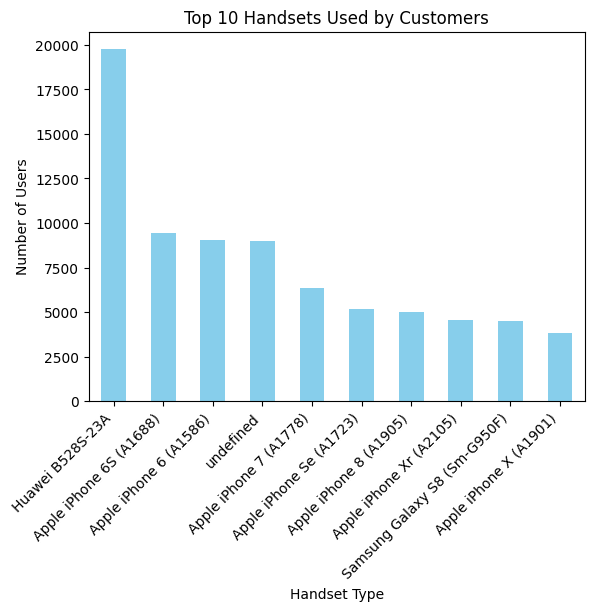

In [8]:
#visualize the top 10 handsets
eda.plot_top_10_handsets(df)

In [9]:
# print Top 3 Handset Manufacturers
print("Top 3 Handset Manufacturers:")
eda.top_3_handset_manufacturers(df)

Top 3 Handset Manufacturers:


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

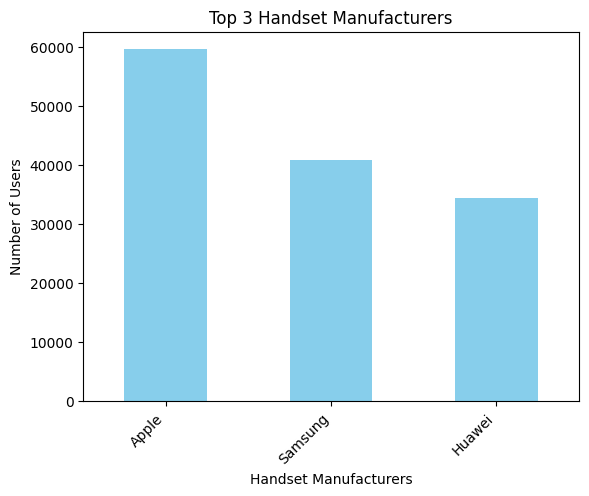

In [10]:
# visualize the top 3 handset manufacturers count
eda.plot_top_3_handset_manufacturers(df)

In [11]:
#Top 5 Handsets per Top 3 Manufacturer
eda.top_5_handsets_per_manufacturer(df)


Top 5 Handsets per Top 3 Manufacturer:


{'Apple': Handset Type
 Apple iPhone 6S (A1688)    9419
 Apple iPhone 6 (A1586)     9023
 Apple iPhone 7 (A1778)     6326
 Apple iPhone Se (A1723)    5187
 Apple iPhone 8 (A1905)     4993
 Name: count, dtype: int64,
 'Samsung': Handset Type
 Samsung Galaxy S8 (Sm-G950F)    4520
 Samsung Galaxy A5 Sm-A520F      3724
 Samsung Galaxy J5 (Sm-J530)     3696
 Samsung Galaxy J3 (Sm-J330)     3484
 Samsung Galaxy S7 (Sm-G930X)    3199
 Name: count, dtype: int64,
 'Huawei': Handset Type
 Huawei B528S-23A                  19752
 Huawei E5180                       2079
 Huawei P20 Lite Huawei Nova 3E     2021
 Huawei P20                         1480
 Huawei Y6 2018                      997
 Name: count, dtype: int64}


Top 5 Handsets per Top 3 Manufacturer:


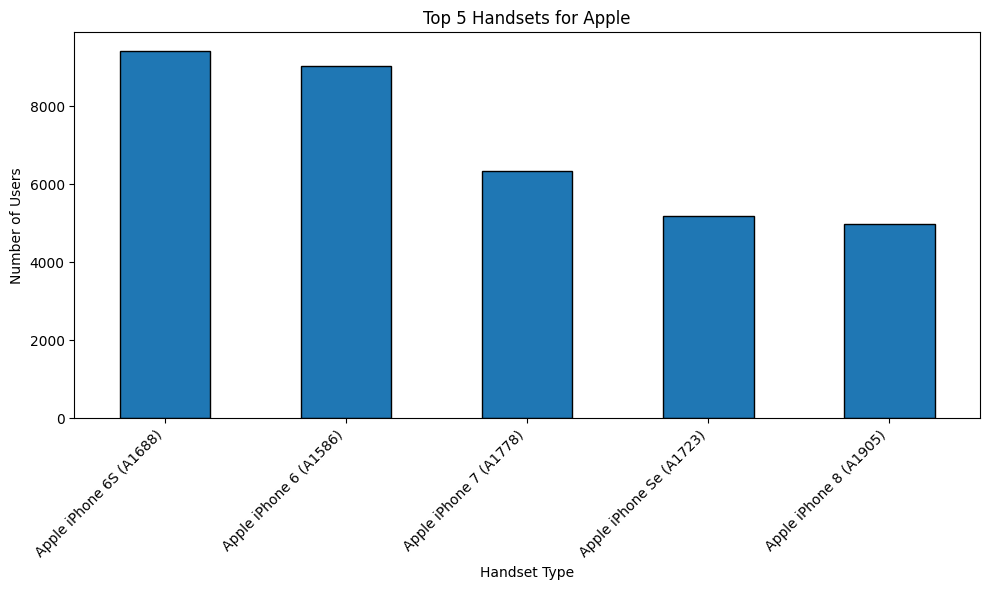

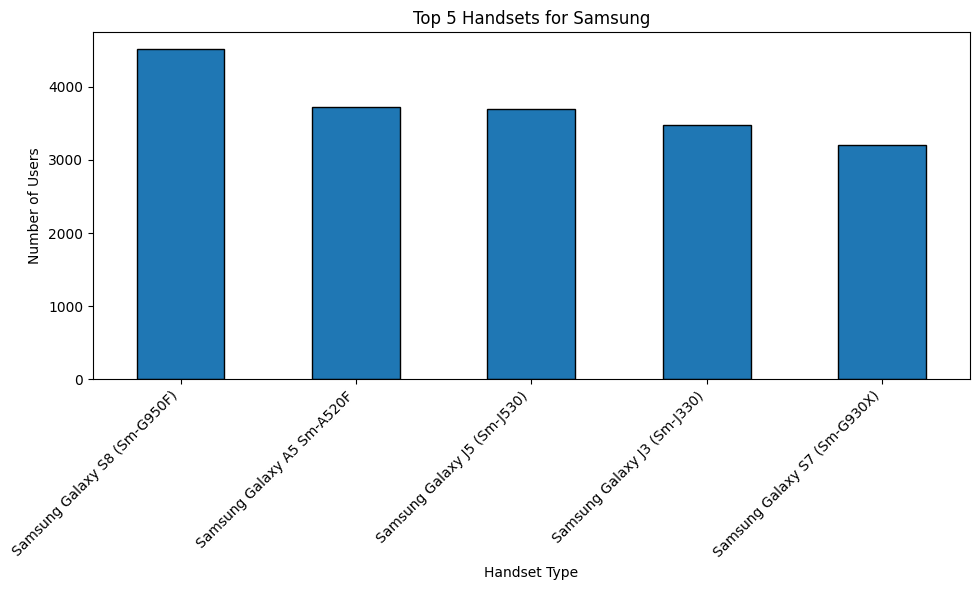

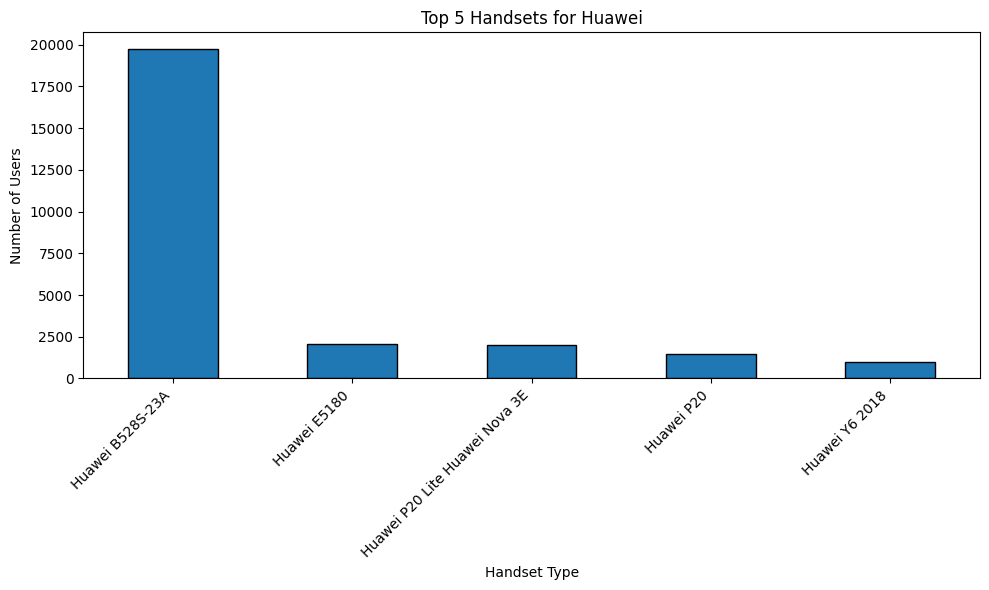

In [12]:
#display Top 5 Handsets per Top 3 Manufacturer
eda.plot_top_5_handsets_per_manufacturer(df)

### Task 1.1 Interpretation and Recommendations
1. Identify key handsets and manufacturers for targeted marketing.
2. Focus on top applications for potential partnerships or promotions.
3. Address high data usage segments with special plans or offers.
4. Use correlation insights to bundle services effectively.

## User Overview Analysis

In [13]:
# Aggregate the required information per user (MSISDN/Number)
user_overview = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),  # Count unique xDR sessions (assuming 'Bearer Id' represents sessions)
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum of session durations
    total_download_data=('Total DL (Bytes)', 'sum'),  # Total download data
    total_upload_data=('Total UL (Bytes)', 'sum'),  # Total upload data
    total_data_volume_social_media=('Social Media DL (Bytes)', 'sum'),  # Total Social Media download volume
    total_data_volume_google=('Google DL (Bytes)', 'sum'),  # Total Google download volume
    total_data_volume_email=('Email DL (Bytes)', 'sum'),  # Total Email download volume
    total_data_volume_youtube=('Youtube DL (Bytes)', 'sum'),  # Total YouTube download volume
    total_data_volume_netflix=('Netflix DL (Bytes)', 'sum'),  # Total Netflix download volume
    total_data_volume_gaming=('Gaming DL (Bytes)', 'sum'),  # Total Gaming download volume
    total_data_volume_other=('Other DL (Bytes)', 'sum')  # Total Other download volume
).reset_index()

# Display the result
print("User Overview:")
user_overview.head()

User Overview:


,MSISDN/Number,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume_social_media,total_data_volume_google,total_data_volume_email,total_data_volume_youtube,total_data_volume_netflix,total_data_volume_gaming,total_data_volume_other
0,3.360100e+10,1,116720140.0,8.426375e+08,36053108.0,2206504.0,3337123.0,837400.0,14900201.0,10265105.0,8.110911e+08,377096990.0
1,3.360100e+10,1,181230963.0,1.207552e+08,36104459.0,2598548.0,4197697.0,2828821.0,5324251.0,770569.0,1.050353e+08,279557701.0
2,3.360100e+10,1,134969374.0,5.566597e+08,39306820.0,3148004.0,3343483.0,2436500.0,2137272.0,16525919.0,5.290685e+08,495086501.0
3,3.360101e+10,1,49878024.0,4.019932e+08,20327526.0,251469.0,5937765.0,2178618.0,4393123.0,1157362.0,3.880748e+08,25248001.0
4,3.360101e+10,2,37104453.0,1.363130e+09,94280527.0,2861230.0,13728668.0,2247808.0,10339971.0,24971647.0,1.308981e+09,777643713.0


In [14]:
# Shape of Agrregated data
user_overview.shape

(106856, 12)

In [15]:
# Check the missing values
user_overview.isnull().sum()

MSISDN/Number                     0
number_of_xDR_sessions            0
total_session_duration            0
total_download_data               0
total_upload_data                 0
total_data_volume_social_media    0
total_data_volume_google          0
total_data_volume_email           0
total_data_volume_youtube         0
total_data_volume_netflix         0
total_data_volume_gaming          0
total_data_volume_other           0
dtype: int64

### Task 1.2 - EDA of the given dataset

In [16]:
data_quality=DataQualityCheck(df)
# Describe all relevant variables and associated data types
print(df.dtypes)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [17]:
# Identify missing values
data_quality.check_missing_data(df)

,Feature,Missing in %
0,Dur. (ms).1,100.00
1,Nb of sec with 37500B < Vol UL,86.84
2,Nb of sec with 6250B < Vol UL < 37500B,74.56
3,Nb of sec with 125000B < Vol DL,65.02
4,TCP UL Retrans. Vol (Bytes),64.43
5,Nb of sec with 31250B < Vol DL < 125000B,62.39
6,Nb of sec with 1250B < Vol UL < 6250B,61.93
7,Nb of sec with 6250B < Vol DL < 31250B,58.88
8,TCP DL Retrans. Vol (Bytes),58.76
9,HTTP UL (Bytes),54.54


In [18]:
# Check duplicate data
data_quality.check_duplicate_data(df)

'Success: No duplicate data!'

#### Variable transformations

Total data per decile class:
          Total Data
Decile              
0.0     4.705828e+12
1.0     9.798435e+12
2.0     1.489371e+13
3.0     1.993898e+13
4.0     2.502774e+13


<Axes: xlabel='Decile'>

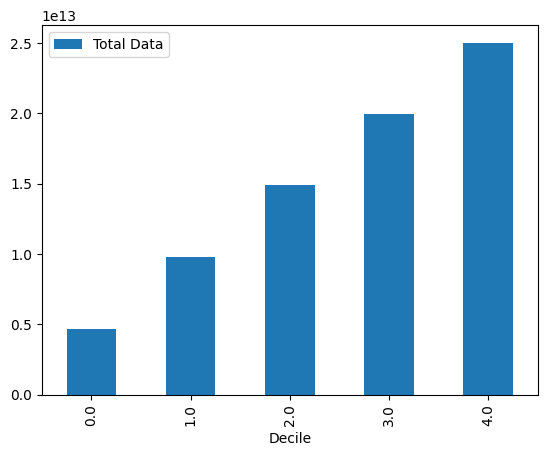

In [19]:
# Create a new column for Total Duration
df['Total Duration'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Compute total data (DL + UL)
df['Total Data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Segment users into 5 decile classes based on total duration
df['Decile'] = pd.qcut(df['Total Duration'], 5, labels=False)

# Compute the total data per decile class
total_data_per_decile = df.groupby('Decile')['Total Data'].sum().to_frame()

print("Total data per decile class:")
print(total_data_per_decile)
total_data_per_decile.plot(kind='bar')

#### Analyze the basic metrics (mean, median....)

In [20]:
# Analyze basic metrics
basic_metrics = df.describe().T
basic_metrics

,count,mean,std,min,25%,50%,75%,max
Bearer Id,149010.0,1.013887e+19,2.893173e+18,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046091e+08,8.103761e+07,7.142988e+06,5.744079e+07,8.639998e+07,1.324308e+08,1.859336e+09
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05


##### Non-Graphical Univariate Analysis

In [21]:
# Select only numeric columns for variance calculation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate variance for numeric columns only
dispersion = numeric_columns.var()
print("Dispersion Parameters:\n", dispersion)

Dispersion Parameters:
 Bearer Id                                   8.370447e+36
Start ms                                    8.329679e+04
End ms                                      8.300026e+04
Dur. (ms)                                   6.567094e+15
IMSI                                        4.617380e+20
MSISDN/Number                               5.989979e+24
IMEI                                        5.024937e+26
Avg RTT DL (ms)                             3.841306e+05
Avg RTT UL (ms)                             7.189942e+03
Avg Bearer TP DL (kbps)                     5.746510e+08
Avg Bearer TP UL (kbps)                     2.139391e+07
TCP DL Retrans. Vol (Bytes)                 3.333054e+16
TCP UL Retrans. Vol (Bytes)                 6.997637e+14
DL TP < 50 Kbps (%)                         1.699903e+02
50 Kbps < DL TP < 250 Kbps (%)              3.862912e+01
250 Kbps < DL TP < 1 Mbps (%)               1.730176e+01
DL TP > 1 Mbps (%)                          2.331818e+01
UL TP <

### Graphical Univariate Analysis

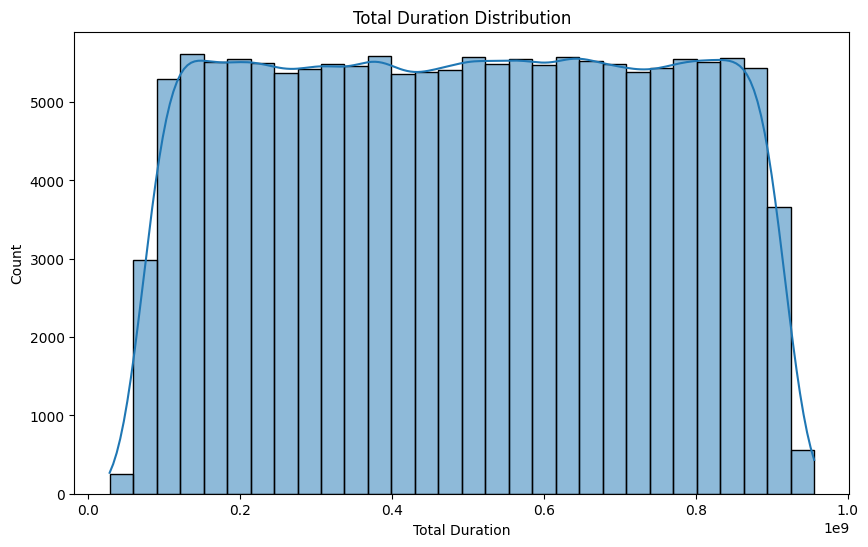

In [22]:
eda.plot_univariate_Analysis(df)

#### Bivariate Analysis


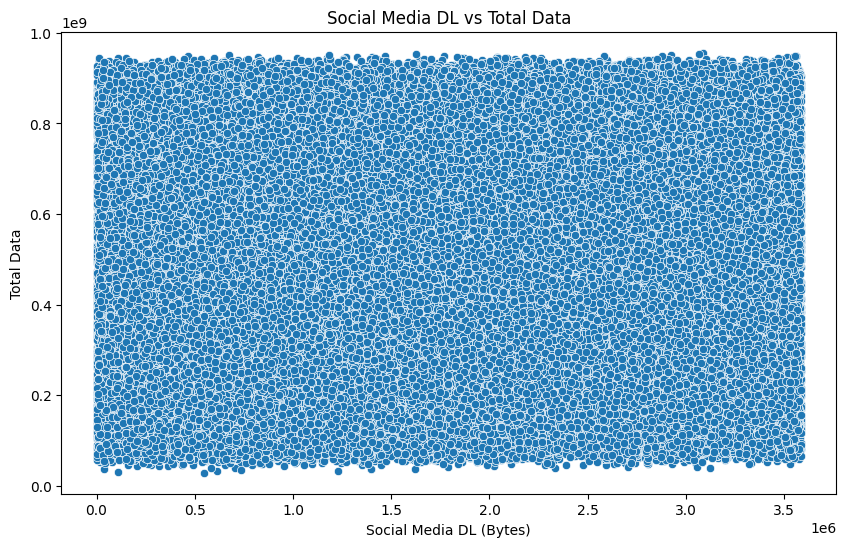

In [23]:
# Bivariate Analysis
eda.plot_bivariate_analysis(df)

#### Correlation Analysis

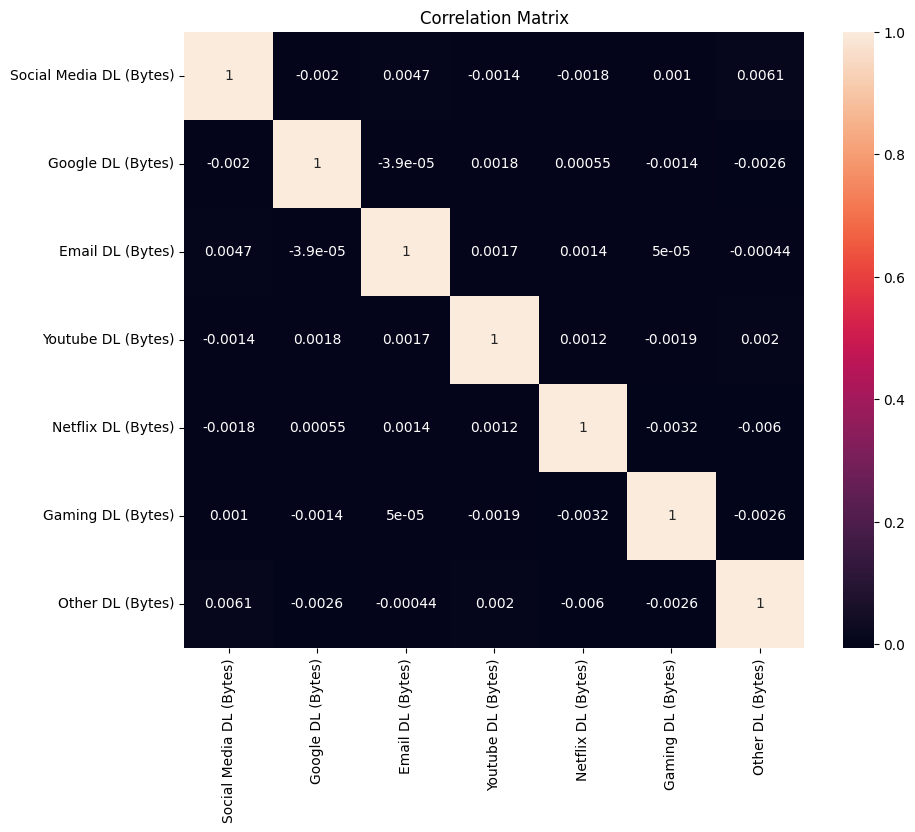

In [24]:
# Correlation Analysis
eda.corr_analysis(df)